In [ ]:
'''
Exercício baseado em:

Livro: Estatística Aplicada à Administração e Economia, Tradução da 8 edição norte-americana (edição completa)
Autores: Anderson, Sweeney, Williams, Camm, Cochran
Editora Cengage, 2021

Capítulo 9: Testes de Hipóteses  
Exercício 27 (adaptado), p. 367
'''

In [ ]:
'''
Para se preparar em casa, o custo médio de uma refeição com ingredientes comprados no mercado é de USD 13,04.
Para uma refeição equivalente, foram coletados os preços cobrados em uma amostra de restaurantes, cujos dados estão no
Arquivo 31.xlsx.
Alguns pesquisadores queriam saber se o preço médio (populacional) cobrado nos restaurantes era menor do que o custo médio para
se preparar a refeição em casa. Para isto realizaram o teste de hipóteses abaixo:

Teste de hipóteses:
Nível de significância escolhido: 5%
H0: μ >= 13,04          (no jupyter notebook: para colocar a letra grega μ, digite \mu e depois pressione tab)
Ha: μ < 13,04

Observações
--> μ: média populacional dos preços cobrados nos restaurantes
--> Rejeitar H0 significa concluir que o preço médio (populacional) cobrado nos resturantes é significativamente menor do que o
    custo médio de se preparar uma refeição equivalente em casa.


A partir disto, pede-se:

a) Argumente que, neste caso, podemos utilizar o procedimento dos testes de hipóteses visto na aula.
b) Trata-se de um teste da cauda inferior, superior ou bicaudal?
c) Utilize o valor-p para verificar se os dados amostrais dos preços cobrados nos restaurantes nos permitem rejeitar H0.

'''


### Importação dos dados

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
dados_amostrais = pd.read_excel("Arquivo 31.xlsx")

In [3]:
dados_amostrais.head()

,Retaurante,Preço
0,1,12.77
1,2,11.61
2,3,11.06
3,4,9.76
4,5,9.49


In [4]:
# n: tamanho da amostra
n
n = dados_amostrais["Preço"].count()    

100

In [5]:
# Estimativa pontual da média populacional
media_amostral = dados_amostrais["Preço"].mean()
media_amostral

12.750499999999997

In [6]:
# Estimativa pontual do desvio padrão populacional
desv_pad_amostral = dados_amostrais["Preço"].std(ddof=1)
desv_pad_amostral

2.001743873564632

### Respostas sugeridas

In [ ]:
'''
a) Argumente que, neste caso, podemos utilizar os procedimentos dos testes de hipóteses vistos na aula.

R. Para que possamos aplicar os testes de hipóteses vistos na aula, precisamos nos certificar de que a distribuição amostral da
média amostral segue uma distribuição normal ou pelo menos aproximadamente normal.
Se os dados populacionais de onde a amostra foi extraída segue uma normal, então a distribuição amostral da média amostral
também segue uma normal.
Como não conhecemos os dados populacionais, vamos nos apoioar no tamanho da amostra (n = 100) para concluir que a distribuição
amostral da média amostral com n = 100 é aproximadamente normal.
De fato, para a maioria das aplicações n > 30 é suficiente para que a distribução da média amostral seja aproximadamente normal.
'''

In [ ]:
'''
b) Trata-se de um teste da cauda inferior, superior ou bicaudal?

R. Pela hipótese alternativa (sinal de menor) podemos ver que trata-se de um teste da cauda inferior.
'''

In [ ]:
'''
c) Calcule o valor-p
'''

In [ ]:
# Podemos utilizar a função scipy.stats.ttest_1samp()

In [7]:
hipotese_media_populacional = 13.04    # Conforme a hipótese nula enquanto igualdade

teste_t = stats.ttest_1samp(dados_amostrais['Preço'], 
                  popmean=hipotese_media_populacional, 
                  alternative='less' )

In [8]:
teste_t.statistic

-1.4462389710451111

In [9]:
teste_t.pvalue

0.07563438603684874

In [ ]:
'''
Critério de decisão: valor p
Rejeitar H0 se (valor p <= nivel de significância)
Não rejeitar H0 se (valor p > nivel de significância)

Temos:
valor p = 0.07563
nivel de significancia estabelecido = 0.05
Portanto: valor p > nivel de significância

Como (valor p > nivel de significância) não rejeitamos a hipótese nula H0.
Ou seja, considerando o nível de significância estabelecido no estudo não há evidência estatística forte o suficiente para
concluirmos que o preço médio cobrado nos resturantes é significativamente menor do que o custo médio de se preparar uma 
refeição equivalente em casa.

'''

In [ ]:
# Abaixo calculamos o valor p utilizando as fórmulas que vimos em aula
# Note que o resultado é o mesmo que o obtido acima com a função scipy.stats.ttest_1samp()

In [10]:
hipotese_media_populacional = 13.04
erro_padrao_media_amostral = desv_pad_amostral / n ** 0.5

# Estatística de teste
t = (media_amostral - hipotese_media_populacional) / erro_padrao_media_amostral
t

-1.4462389710451373

In [11]:
graus_liberdade = n - 1

valor_p = stats.t.cdf(t, df=graus_liberdade)
valor_p

0.07563438603684504

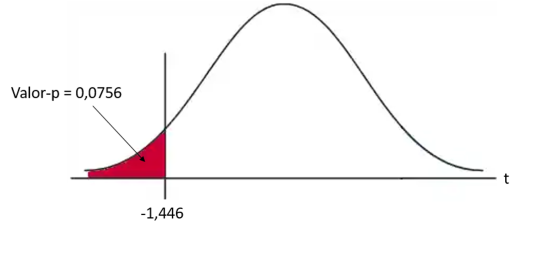